In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PhD/faith_project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PhD/faith_project


In [ ]:
%ls

 datasets/     extractor.py          log.txt         preprocessing/   utils.py
 demo.py       image_file_list.txt   meta_data.csv   __pycache__/
 demos.ipynb  'log (1).txt'          models/         trainer.py


In [2]:
from preprocessing.src import detect_faces, show_bboxes
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def extract_and_visualise_faces_from_image(image_path, detect_faces, show_bboxes reduce_resolution=False, reduction_ratio=0.4, resample=Image.NEAREST, enlargement_percentage = 0.8):
    img_resized = Image.open(image_path)
    plt.imshow(img_resized)
    print("img_resized:  ", img_resized.size)
    plt.show()
    new_width = int(img_resized.width*reduction_ratio)
    new_height = int(img_resized.height*reduction_ratio)
    print(new_width, new_height)
    img_resized = img_resized.resize((new_width, new_height), resample=Image.NEAREST)
    print("done.......")
    plt.imshow(img_resized)
    plt.show()
    print("img_resized:  ", img_resized.size)
    bounding_boxes, landmarks = detect_faces(img_resized, min_face_size=5.0)
    #print("bounding box shape: ", bounding_boxes.shape)
    print("done.......")
    img_resized_with_bb = show_bboxes(img_resized, bounding_boxes, landmarks)
    plt.imshow(img_resized_with_bb)
    plt.show()
    print("done.......")
    #image_name = image_path.split('.')[0]
    image_name = image_path.replace("unprocessed_val", "val").split(".")[0]

    for i, box in enumerate(bounding_boxes):
        x1, y1, x2, y2, _ = box
        width = x2 - x1
        height = y2 - y1

        # Calculate enlargement amounts
        x_enlargement = width * enlargement_percentage / 2
        y_enlargement = height * enlargement_percentage / 2

        # Adjust bounding box coordinates
        x1_enlarged = int(max(0, x1 - x_enlargement))
        y1_enlarged = int(max(0, y1 - y_enlargement))
        x2_enlarged = int(min(img_resized.width, x2 + x_enlargement))
        y2_enlarged = int(min(img_resized.height, y2 + y_enlargement))

        cropped_face = img_resized.crop((x1_enlarged, y1_enlarged, x2_enlarged, y2_enlarged))
        plt.imshow(cropped_face)
        plt.show()
        output_filename = f"{image_name}_0{i+1}.jpg"  # Or .png
        #cropped_face.save(output_filename)
        print(f"Enlarged face {i+1} saved to {output_filename}")

img_resized:   (1350, 900)


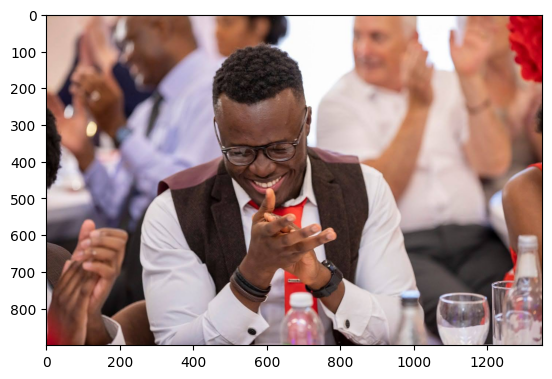

540 360
done.......


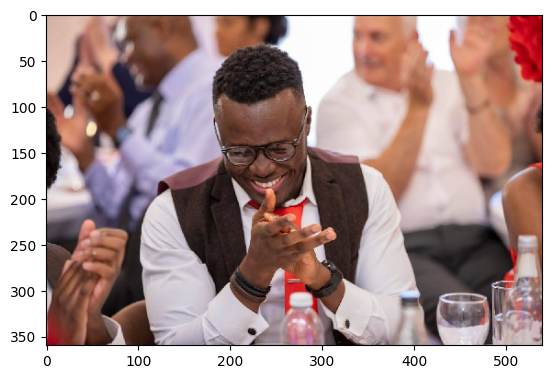

img_resized:   (540, 360)
starting detect face
models loaded
starting stage 1
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
boxes: box
bounding_boxes:  [None, None, None, None, array([[ 2.15000000e+02,  1.75000000e+02,  2.35000000e+02,
         1.95000000e+02,  6.01237178e-01,  2.18116865e-02,
        -7.41091669e-02,  2.54921243e-02,  1.68869495e-01]]), None, None, None, array([[ 2.00000000e+01,  3.30000000e+01,  1.00000000e+02,
         1.13000000e+02,  6.49820745e-01,  1.05222926e-01,
        -3.02123241e-02, -1.13258645e-01,  7.53091872e-02]]), array([[ 1.98000000e+02,  8.50000000e+01,  3.12000000e+02,
         1.98000000e+02,  6.14262462e-01, -2.96322256e-02,
         6.81478679e-02, -8.06263685e-02,  1.99808165e-01]]), None, None, None]
bounding_boxes:  [[ 15.  31. 104. 119.   0.]
 [185.  93. 313. 221.   0.]
 [213. 173. 238. 199.   0.]]
starting stage 2
starting stage 3
done.......


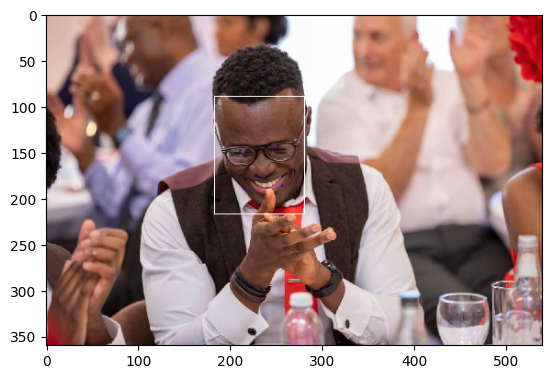

done.......


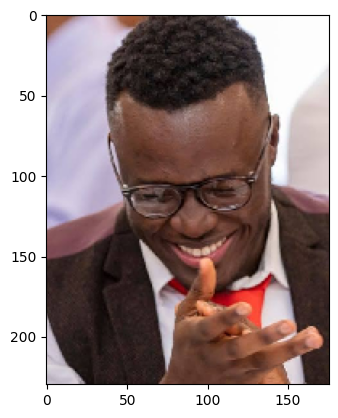

Enlarged face 1 saved to datasets/VGG_Faces2/val/n000090/0018_01.jpg


In [ ]:
image_path = 'datasets/VGG_Faces2/unprocessed_val/n000090/0018.jpg'
extract_faces_from_image(image_path=image_path)

In [ ]:
%run demo.py extract --arch_type resnet50_ft --test_img_list_file "image_file_list.txt" --meta_file "meta_data.csv" --dataset_dir "datasets" --weight_file "models/resnet50_ft_weight.pkl" --feature_dir "datasets" --log_file "log.txt"

Namespace(cmd='extract', arch_type='resnet50_ft', dataset_dir='datasets', log_file='log.txt', train_img_list_file='/path/to/train_image_list.txt', test_img_list_file='image_file_list.txt', meta_file='meta_data.csv', checkpoint_dir='/path/to/checkpoint_directory', feature_dir='datasets', config=1, batch_size=32, resume='', weight_file='models/resnet50_ft_weight.pkl', gpu=0, workers=4, horizontal_flip=False)


/content/drive/MyDrive/PhD/faith_project/utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


df:     Class_ID      Name  Flag
0   n000002  Person B     1
1   n000003  Person C     1
2   n000004  Person D     1
3   n000005  Person E     1
4   n000006  Person F     1
5   n000007  Person G     1
6   n000008  Person H     1
7   n000010  Person J     1
8   n000011  Person K     1
9   n000012  Person L     1
10  n000013  Person M     1
11  n000014  Person N     1
12  n000015  Person O     1
13  n000016  Person P     1
14  n000017  Person Q     1
15  n000018  Person R     1
16  n000019  Person S     1
17  n000020  Person T     1
18  n000021  Person T     1
19  n000022  Person T     1
20  n000090  Person T     1
id_label_dict:  {'n000002': np.int64(0), 'n000003': np.int64(1), 'n000004': np.int64(2), 'n000005': np.int64(3), 'n000006': np.int64(4), 'n000007': np.int64(5), 'n000008': np.int64(6), 'n000010': np.int64(7), 'n000011': np.int64(8), 'n000012': np.int64(9), 'n000013': np.int64(10), 'n000014': np.int64(11), 'n000015': np.int64(12), 'n000016': np.int64(13), 'n000017': np.int64(14

Extract:   0%|                                            | 0/1 [00:00<?, ?it/s]/content/drive/MyDrive/PhD/faith_project/extractor.py:57: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  imgs = Variable(imgs, volatile=True)


feature_file:  datasets/VGG_Faces2/val/n000002/0001_01.npy
feature_file:  datasets/VGG_Faces2/val/n000002/0002_01.npy
feature_file:  datasets/VGG_Faces2/val/n000002/0003_01.npy
feature_file:  datasets/VGG_Faces2/val/n000003/0001_01.npy
feature_file:  datasets/VGG_Faces2/val/n000003/0002_01.npy
feature_file:  datasets/VGG_Faces2/val/n000003/0003_01.npy
feature_file:  datasets/VGG_Faces2/val/n000004/0001_01.npy
feature_file:  datasets/VGG_Faces2/val/n000004/0002_02.npy
feature_file:  datasets/VGG_Faces2/val/n000004/0003_01.npy
feature_file:  datasets/VGG_Faces2/val/n000005/0001_01.npy
feature_file:  datasets/VGG_Faces2/val/n000005/0002_01.npy
feature_file:  datasets/VGG_Faces2/val/n000005/0003_01.npy
feature_file:  datasets/VGG_Faces2/val/n000013/0208_01.npy
feature_file:  datasets/VGG_Faces2/val/n000013/0218_01.npy
feature_file:  datasets/VGG_Faces2/val/n000020/0205_07.npy
feature_file:  datasets/VGG_Faces2/val/n000020/0205_13.npy
feature_file:  datasets/VGG_Faces2/val/n000008/0001_01.n

<Figure size 640x480 with 0 Axes>

In [ ]:
%run demo.py test --arch_type resnet50_ft --test_img_list_file "image_file_list.txt" --meta_file "meta_data.csv" --dataset_dir "datasets" --weight_file "models/resnet50_ft_weight.pkl" --feature_dir "datasets" --log_file "log.txt"

Namespace(cmd='test', arch_type='resnet50_ft', dataset_dir='datasets', log_file='log.txt', train_img_list_file='/path/to/train_image_list.txt', test_img_list_file='image_file_list.txt', meta_file='meta_data.csv', checkpoint_dir='/path/to/checkpoint_directory', feature_dir='datasets', config=1, batch_size=32, resume='', weight_file='models/resnet50_ft_weight.pkl', gpu=0, workers=4, horizontal_flip=False)
df:     Class_ID      Name  Flag
0   n000002  Person B     1
1   n000003  Person C     1
2   n000004  Person D     1
3   n000005  Person E     1
4   n000006  Person F     1
5   n000007  Person G     1
6   n000008  Person H     1
7   n000010  Person J     1
8   n000011  Person K     1
9   n000012  Person L     1
10  n000013  Person M     1
11  n000014  Person N     1
12  n000015  Person O     1
13  n000016  Person P     1
14  n000017  Person Q     1
15  n000018  Person R     1
16  n000019  Person S     1
17  n000020  Person U     1
18  n000021  Person V     1
19  n000022  Person W     1


/content/drive/MyDrive/PhD/faith_project/utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")
/content/drive/MyDrive/PhD/faith_project/utils.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


df:     Class_ID      Name  Flag
0   n000002  Person B     1
1   n000003  Person C     1
2   n000004  Person D     1
3   n000005  Person E     1
4   n000006  Person F     1
5   n000007  Person G     1
6   n000008  Person H     1
7   n000010  Person J     1
8   n000011  Person K     1
9   n000012  Person L     1
10  n000013  Person M     1
11  n000014  Person N     1
12  n000015  Person O     1
13  n000016  Person P     1
14  n000017  Person Q     1
15  n000018  Person R     1
16  n000019  Person S     1
17  n000020  Person U     1
18  n000021  Person V     1
19  n000022  Person W     1
20  n000090  Person X     1
id_label_dict:  {np.int64(0): 'Person B', np.int64(1): 'Person C', np.int64(2): 'Person D', np.int64(3): 'Person E', np.int64(4): 'Person F', np.int64(5): 'Person G', np.int64(6): 'Person H', np.int64(7): 'Person J', np.int64(8): 'Person K', np.int64(9): 'Person L', np.int64(10): 'Person M', np.int64(11): 'Person N', np.int64(12): 'Person O', np.int64(13): 'Person P', np.int64

Valid iteration=0 epoch=0:   0%|                          | 0/1 [00:00<?, ?it/s]/content/drive/MyDrive/PhD/faith_project/trainer.py:91: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  imgs = Variable(imgs, volatile=True)
/content/drive/MyDrive/PhD/faith_project/trainer.py:92: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  target = Variable(target, volatile=True)
                                                                                

loss:  tensor(0.6339, grad_fn=<NllLossBackward0>)
loss.item(): 0.633853018283844
output:  torch.Size([21, 8631])
output:  tensor([   0,    0,    0,    1,    1,    1,    2,    2,    2,    3,    3,    3,
          10,   10,   17,   17,    6,    6,    4,    4, 4647])
target:  tensor([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3, 10, 10, 17, 17,  6,  6,
         4,  4, 20])
Target:  ['Person B', 'Person B', 'Person B', 'Person C', 'Person C', 'Person C', 'Person D', 'Person D', 'Person D', 'Person E', 'Person E', 'Person E', 'Person M', 'Person M', 'Person U', 'Person U', 'Person H', 'Person H', 'Person F', 'Person F', 'Person X']
correct[:k].shape:  torch.Size([1, 21])
correct[:k].shape:  torch.Size([5, 21])
Prec1:  tensor([95.2381])
Test: [0/1/21]	epoch: 0	iter: 0	Time: 4.314 (4.314)	Loss: 0.6339 (0.6339)	Prec@1: 95.238 (95.238)	Prec@5: 95.238 (95.238)	


In [3]:
%run demo.py test --arch_type resnet50_ft --test_img_list_file "test_image_file_list.txt" --meta_file "train_meta_data.csv" --dataset_dir "datasets" --feature_dir "datasets" --log_file "log.txt" --resume "checkpoint/model_best.pth.tar"

Namespace(cmd='test', arch_type='resnet50_ft', dataset_dir='datasets', log_file='log.txt', train_img_list_file='/path/to/train_image_list.txt', test_img_list_file='test_image_file_list.txt', meta_file='train_meta_data.csv', checkpoint_dir='/path/to/checkpoint_directory', feature_dir='datasets', config=1, batch_size=32, resume='checkpoint/model_best.pth.tar', weight_file='/path/to/weight_file.pkl', gpu=0, workers=4, horizontal_flip=False)
df:    Class_ID      Name  Flag
0  n000001  Person B     1
1  n000002  Person C     1
2  n000003  Person D     1
3  n000004  Person E     1
4  n000005  Person F     1
5  n000006  Person G     1
6  n000007  Person H     1
7  n000008  Person J     1
8  n000009  Person K     1
9  n000010  Person L     1
id_label_dict:  {'n000001': np.int64(0), 'n000002': np.int64(1), 'n000003': np.int64(2), 'n000004': np.int64(3), 'n000005': np.int64(4), 'n000006': np.int64(5), 'n000007': np.int64(6), 'n000008': np.int64(7), 'n000009': np.int64(8), 'n000010': np.int64(9)}

/content/drive/MyDrive/PhD/faith_project/utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


class_id  n000001
label  0
processing: 0 images for valid
class_id  n000001
label  0
class_id  n000001
label  0
class_id  n000001
label  0
class_id  n000002
label  1
class_id  n000002
label  1
class_id  n000002
label  1
class_id  n000002
label  1
class_id  n000003
label  2
class_id  n000003
label  2
class_id  n000003
label  2
class_id  n000003
label  2
class_id  n000004
label  3
class_id  n000004
label  3
class_id  n000004
label  3
class_id  n000004
label  3
class_id  n000005
label  4
class_id  n000005
label  4
class_id  n000005
label  4
class_id  n000005
label  4
class_id  n000006
label  5
class_id  n000006
label  5
class_id  n000006
label  5
class_id  n000006
label  5
class_id  n000007
label  6
class_id  n000007
label  6
class_id  n000007
label  6
class_id  n000007
label  6
class_id  n000008
label  7
class_id  n000008
label  7
class_id  n000008
label  7
class_id  n000008
label  7
class_id  n000009
label  8
class_id  n000009
label  8
class_id  n000009
label  8
class_id  n000009
label 

/content/drive/MyDrive/PhD/faith_project/utils.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


Resume from epoch: 0, iteration: 9
df:    Class_ID      Name  Flag
0  n000001  Person B     1
1  n000002  Person C     1
2  n000003  Person D     1
3  n000004  Person E     1
4  n000005  Person F     1
5  n000006  Person G     1
6  n000007  Person H     1
7  n000008  Person J     1
8  n000009  Person K     1
9  n000010  Person L     1
id_label_dict:  {np.int64(0): 'Person B', np.int64(1): 'Person C', np.int64(2): 'Person D', np.int64(3): 'Person E', np.int64(4): 'Person F', np.int64(5): 'Person G', np.int64(6): 'Person H', np.int64(7): 'Person J', np.int64(8): 'Person K', np.int64(9): 'Person L'}


Valid iteration=0 epoch=0:   0%|                          | 0/2 [00:00<?, ?it/s]/content/drive/MyDrive/PhD/faith_project/trainer.py:91: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  imgs = Variable(imgs, volatile=True)
/content/drive/MyDrive/PhD/faith_project/trainer.py:92: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  target = Variable(target, volatile=True)
Valid iteration=0 epoch=0:  50%|█████████         | 1/2 [00:19<00:19, 19.81s/it]

loss:  tensor(0.3203, grad_fn=<NllLossBackward0>)
loss.item(): 0.3203297555446625
output:  tensor([0, 0, 0, 0, 1, 1, 5, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5,
        6, 6, 6, 6, 7, 4, 7, 7])
target:  tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5,
        6, 6, 6, 6, 7, 7, 7, 7])
Prediction:  ['Person B', 'Person B', 'Person B', 'Person B', 'Person C', 'Person C', 'Person G', 'Person C', 'Person D', 'Person D', 'Person D', 'Person D', 'Person E', 'Person E', 'Person E', 'Person E', 'Person F', 'Person F', 'Person F', 'Person F', 'Person G', 'Person G', 'Person G', 'Person G', 'Person H', 'Person H', 'Person H', 'Person H', 'Person J', 'Person F', 'Person J', 'Person J']
True:  ['Person B', 'Person B', 'Person B', 'Person B', 'Person C', 'Person C', 'Person C', 'Person C', 'Person D', 'Person D', 'Person D', 'Person D', 'Person E', 'Person E', 'Person E', 'Person E', 'Person F', 'Person F', 'Person F', 'Person F', 'Person G', 'Person G', 'Per

loss:  tensor(1.0816, grad_fn=<NllLossBackward0>)
loss.item(): 1.0816476345062256
output:  tensor([9, 0, 8, 5, 9, 9, 9, 9])
target:  tensor([8, 8, 8, 8, 9, 9, 9, 9])
Prediction:  ['Person L', 'Person B', 'Person K', 'Person G', 'Person L', 'Person L', 'Person L', 'Person L']
True:  ['Person K', 'Person K', 'Person K', 'Person K', 'Person L', 'Person L', 'Person L', 'Person L']
correct[:k].shape:  torch.Size([1, 8])
correct[:k].shape:  torch.Size([5, 8])
Test: [1/2/40]	epoch: 0	iter: 0	Time: 4.877 (12.345)	Loss: 1.0816 (0.4726)	Prec@1: 62.500 (87.500)	Prec@5: 100.000 (100.000)	


## Train

In [3]:
%run demo.py train --arch_type resnet50_ft --train_img_list_file "train_image_file_list.txt" --test_img_list_file "train_image_file_list.txt" --meta_file "train_meta_data.csv" --dataset_dir "datasets" --weight_file "models/resnet50_ft_weight.pkl" --feature_dir "datasets" --log_file "log_train.txt" --config 1 --batch_size 10 --checkpoint_dir "checkpoint"

Namespace(cmd='train', arch_type='resnet50_ft', dataset_dir='datasets', log_file='log_train.txt', train_img_list_file='train_image_file_list.txt', test_img_list_file='train_image_file_list.txt', meta_file='train_meta_data.csv', checkpoint_dir='checkpoint', feature_dir='datasets', config=1, batch_size=10, resume='', weight_file='models/resnet50_ft_weight.pkl', gpu=0, workers=4, horizontal_flip=False)
df:    Class_ID      Name  Flag
0  n000001  Person B     1
1  n000002  Person C     1
2  n000003  Person D     1
3  n000004  Person E     1
4  n000005  Person F     1
5  n000006  Person G     1
6  n000007  Person H     1
7  n000008  Person J     1
8  n000009  Person K     1
9  n000010  Person L     1
id_label_dict:  {'n000001': np.int64(0), 'n000002': np.int64(1), 'n000003': np.int64(2), 'n000004': np.int64(3), 'n000005': np.int64(4), 'n000006': np.int64(5), 'n000007': np.int64(6), 'n000008': np.int64(7), 'n000009': np.int64(8), 'n000010': np.int64(9)}
root   datasets
class_id  n000001
labe

/content/drive/MyDrive/PhD/faith_project/utils.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1

Train epoch=0, iter=0:  10%|██                   | 1/10 [00:01<00:15,  1.73s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [0/10/10]	epoch: 0	iter: 0	Time: 1.732 (1.732)	Data: 0.090 (0.090)	Loss: 3.0582 (3.0582)	Prec@1: 10.000 (10.000)	Prec@5: 60.000 (60.000)	lr 0.001000



Train epoch=0, iter=0:  20%|████▏                | 2/10 [00:03<00:14,  1.78s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [1/10/20]	epoch: 0	iter: 1	Time: 1.811 (1.771)	Data: 0.079 (0.085)	Loss: 2.1240 (2.5911)	Prec@1: 40.000 (25.000)	Prec@5: 70.000 (65.000)	lr 0.001000



Train epoch=0, iter=0:  30%|██████▎              | 3/10 [00:05<00:13,  1.90s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [2/10/30]	epoch: 0	iter: 2	Time: 2.043 (1.862)	Data: 0.076 (0.082)	Loss: 3.5541 (2.9121)	Prec@1: 10.000 (20.000)	Prec@5: 70.000 (66.667)	lr 0.001000



Train epoch=0, iter=0:  40%|████████▍            | 4/10 [00:07<00:10,  1.83s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [3/10/40]	epoch: 0	iter: 3	Time: 1.732 (1.829)	Data: 0.087 (0.083)	Loss: 2.0097 (2.6865)	Prec@1: 30.000 (22.500)	Prec@5: 90.000 (72.500)	lr 0.001000



Train epoch=0, iter=0:  50%|██████████▌          | 5/10 [00:09<00:08,  1.79s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [4/10/50]	epoch: 0	iter: 4	Time: 1.726 (1.808)	Data: 0.077 (0.082)	Loss: 2.3021 (2.6096)	Prec@1: 20.000 (22.000)	Prec@5: 60.000 (70.000)	lr 0.001000



Train epoch=0, iter=0:  60%|████████████▌        | 6/10 [00:10<00:07,  1.79s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [5/10/60]	epoch: 0	iter: 5	Time: 1.789 (1.805)	Data: 0.101 (0.085)	Loss: 0.8462 (2.3157)	Prec@1: 60.000 (28.333)	Prec@5: 100.000 (75.000)	lr 0.001000



Train epoch=0, iter=0:  70%|██████████████▋      | 7/10 [00:12<00:05,  1.77s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [6/10/70]	epoch: 0	iter: 6	Time: 1.714 (1.792)	Data: 0.078 (0.084)	Loss: 0.6371 (2.0759)	Prec@1: 90.000 (37.143)	Prec@5: 100.000 (78.571)	lr 0.001000



Train epoch=0, iter=0:  80%|████████████████▊    | 8/10 [00:14<00:03,  1.75s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [7/10/80]	epoch: 0	iter: 7	Time: 1.722 (1.783)	Data: 0.074 (0.083)	Loss: 0.1860 (1.8397)	Prec@1: 100.000 (45.000)	Prec@5: 100.000 (81.250)	lr 0.001000



Train epoch=0, iter=0:  90%|██████████████████▉  | 9/10 [00:16<00:01,  1.85s/it]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [8/10/90]	epoch: 0	iter: 8	Time: 2.052 (1.813)	Data: 0.079 (0.082)	Loss: 0.4488 (1.6851)	Prec@1: 80.000 (48.889)	Prec@5: 100.000 (83.333)	lr 0.001000
df:    Class_ID      Name  Flag
0  n000001  Person B     1
1  n000002  Person C     1
2  n000003  Person D     1
3  n000004  Person E     1
4  n000005  Person F     1
5  n000006  Person G     1
6  n000007  Person H     1
7  n000008  Person J     1
8  n000009  Person K     1
9  n000010  Person L     1
id_label_dict:  {np.int64(0): 'Person B', np.int64(1): 'Person C', np.int64(2): 'Person D', np.int64(3): 'Person E', np.int64(4): 'Person F', np.int64(5): 'Person G', np.int64(6): 'Person H', np.int64(7): 'Person J', np.int64(8): 'Person K', np.int64(9): 'Person L'}


/content/drive/MyDrive/PhD/faith_project/utils.py:55: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(identity_list, sep=',\s+', quoting=csv.QUOTE_ALL, encoding="utf-8")


Valid iteration=9 epoch=0:   0%|                         | 0/10 [00:00<?, ?it/s]/content/drive/MyDrive/PhD/faith_project/trainer.py:91: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  imgs = Variable(imgs, volatile=True)
/content/drive/MyDrive/PhD/faith_project/trainer.py:92: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  target = Variable(target, volatile=True)


Valid iteration=9 epoch=0:  10%|█▋               | 1/10 [00:01<00:13,  1.55s/it]

loss:  tensor(0.0212, grad_fn=<NllLossBackward0>)
loss.item(): 0.021229421719908714
output:  torch.Size([10, 10])
output:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
target:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Target:  ['Person B', 'Person B', 'Person B', 'Person B', 'Person B', 'Person B', 'Person B', 'Person B', 'Person B', 'Person B']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [0/10/10]	epoch: 0	iter: 9	Time: 1.552 (1.552)	Loss: 0.0212 (0.0212)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  20%|███▍             | 2/10 [00:03<00:12,  1.53s/it]

loss:  tensor(0.0143, grad_fn=<NllLossBackward0>)
loss.item(): 0.014341366477310658
output:  torch.Size([10, 10])
output:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
target:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Target:  ['Person C', 'Person C', 'Person C', 'Person C', 'Person C', 'Person C', 'Person C', 'Person C', 'Person C', 'Person C']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [1/10/20]	epoch: 0	iter: 9	Time: 1.511 (1.531)	Loss: 0.0143 (0.0178)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  30%|█████            | 3/10 [00:04<00:10,  1.51s/it]

loss:  tensor(0.0700, grad_fn=<NllLossBackward0>)
loss.item(): 0.07004405558109283
output:  torch.Size([10, 10])
output:  tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
target:  tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
Target:  ['Person D', 'Person D', 'Person D', 'Person D', 'Person D', 'Person D', 'Person D', 'Person D', 'Person D', 'Person D']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [2/10/30]	epoch: 0	iter: 9	Time: 1.484 (1.516)	Loss: 0.0700 (0.0352)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  40%|██████▊          | 4/10 [00:06<00:09,  1.51s/it]

loss:  tensor(0.0023, grad_fn=<NllLossBackward0>)
loss.item(): 0.0022765188477933407
output:  torch.Size([10, 10])
output:  tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
target:  tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Target:  ['Person E', 'Person E', 'Person E', 'Person E', 'Person E', 'Person E', 'Person E', 'Person E', 'Person E', 'Person E']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [3/10/40]	epoch: 0	iter: 9	Time: 1.503 (1.512)	Loss: 0.0023 (0.0270)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  50%|████████▌        | 5/10 [00:07<00:07,  1.50s/it]

loss:  tensor(0.0123, grad_fn=<NllLossBackward0>)
loss.item(): 0.012344338931143284
output:  torch.Size([10, 10])
output:  tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
target:  tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
Target:  ['Person F', 'Person F', 'Person F', 'Person F', 'Person F', 'Person F', 'Person F', 'Person F', 'Person F', 'Person F']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [4/10/50]	epoch: 0	iter: 9	Time: 1.490 (1.508)	Loss: 0.0123 (0.0240)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  60%|██████████▏      | 6/10 [00:09<00:06,  1.51s/it]

loss:  tensor(0.0236, grad_fn=<NllLossBackward0>)
loss.item(): 0.023587903007864952
output:  torch.Size([10, 10])
output:  tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
target:  tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
Target:  ['Person G', 'Person G', 'Person G', 'Person G', 'Person G', 'Person G', 'Person G', 'Person G', 'Person G', 'Person G']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [5/10/60]	epoch: 0	iter: 9	Time: 1.519 (1.510)	Loss: 0.0236 (0.0240)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  70%|███████████▉     | 7/10 [00:10<00:04,  1.55s/it]

loss:  tensor(0.0313, grad_fn=<NllLossBackward0>)
loss.item(): 0.031257595866918564
output:  torch.Size([10, 10])
output:  tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])
target:  tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])
Target:  ['Person H', 'Person H', 'Person H', 'Person H', 'Person H', 'Person H', 'Person H', 'Person H', 'Person H', 'Person H']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [6/10/70]	epoch: 0	iter: 9	Time: 1.626 (1.526)	Loss: 0.0313 (0.0250)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  80%|█████████████▌   | 8/10 [00:12<00:03,  1.61s/it]

loss:  tensor(0.0145, grad_fn=<NllLossBackward0>)
loss.item(): 0.014546623453497887
output:  torch.Size([10, 10])
output:  tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])
target:  tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])
Target:  ['Person J', 'Person J', 'Person J', 'Person J', 'Person J', 'Person J', 'Person J', 'Person J', 'Person J', 'Person J']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [7/10/80]	epoch: 0	iter: 9	Time: 1.748 (1.554)	Loss: 0.0145 (0.0237)	Prec@1: 100.000 (100.000)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0:  90%|███████████████▎ | 9/10 [00:13<00:01,  1.58s/it]

loss:  tensor(0.6153, grad_fn=<NllLossBackward0>)
loss.item(): 0.6153059601783752
output:  torch.Size([10, 10])
output:  tensor([8, 8, 8, 4, 8, 8, 8, 8, 8, 8])
target:  tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8])
Target:  ['Person K', 'Person K', 'Person K', 'Person K', 'Person K', 'Person K', 'Person K', 'Person K', 'Person K', 'Person K']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([90.])
Test: [8/10/90]	epoch: 0	iter: 9	Time: 1.518 (1.550)	Loss: 0.6153 (0.0894)	Prec@1: 90.000 (98.889)	Prec@5: 100.000 (100.000)	




Valid iteration=9 epoch=0: 100%|████████████████| 10/10 [00:15<00:00,  1.57s/it]

                                                                                

loss:  tensor(0.0058, grad_fn=<NllLossBackward0>)
loss.item(): 0.005804188083857298
output:  torch.Size([10, 10])
output:  tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
target:  tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
Target:  ['Person L', 'Person L', 'Person L', 'Person L', 'Person L', 'Person L', 'Person L', 'Person L', 'Person L', 'Person L']
correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Prec1:  tensor([100.])
Test: [9/10/100]	epoch: 0	iter: 9	Time: 1.541 (1.549)	Loss: 0.0058 (0.0811)	Prec@1: 100.000 (99.000)	Prec@5: 100.000 (100.000)	
Test_summary: [9/10/100] epoch: 0 iter: 9	BestPrec@1: 99.000	BestPrec@5: 100.000	Time: 1.549	Loss: 0.0811	Prec@1: 99.000	Prec@5: 100.000	
checkpoint_file: checkpoint/checkpoint.pth.tar
file saved............................



Train:   0%|                                              | 0/1 [00:35<?, ?it/s]

correct[:k].shape:  torch.Size([1, 10])
correct[:k].shape:  torch.Size([5, 10])
Train: [9/10/100]	epoch: 0	iter: 9	Time: 19.498 (3.582)	Data: 0.107 (0.085)	Loss: 0.3550 (1.5521)	Prec@1: 90.000 (53.000)	Prec@5: 100.000 (85.000)	lr 0.001000
Train_summary: [9/10/100]	epoch: 0	iter: 9	Time: 3.582	Data: 0.085	Loss: 1.5521	Prec@1: 53.000	Prec@5: 85.000	lr 0.001000
